# Proceso de comprensión y preparación de datos

## Recogida, comprensión y evaluación de calidad de datos
Un problema que se identificó a priori es que el tipo de dato de SDG en el test set es float, cuando debería ser int. Por otro lado, hay muchos caracteres especiales que deben ser tratados.

In [252]:
import pandas as pd
import re
from sklearn.svm import SVC
import chardet
from num2words import num2words
import spacy
pd.set_option('display.max_rows', None)

# Mostrar todo el contenido de las celdas, sin truncar
pd.set_option('display.max_colwidth', None)

file1 = 'ODScat_345.csv'
file2 = 'TestODScat_345.csv'

df1 = pd.read_csv(file1)
df2 = pd.read_csv(file2)

# Functions
def find_unusual_characters(df, column_name):
    all_text = ' '.join(df[column_name].astype(str))
    unusual_chars = re.findall(r'[^\w\s,.!?;:\-()\'"]', all_text)
    return set(unusual_chars)

# Understanding
print("First few rows of training set:")
display(df1.head())

print("First few rows of test set:")
display(df2.head())

print("\nShape of training set:", df1.shape)

print("Shape of validation set:", df2.shape)

print("\nInfo for training set:")
df1.info()
print("\nInfo for validation set:")
df2.info()

print("\nDescriptive statistics for training set:")
display(df1.describe(include='all'))

print("\nDescriptive statistics for validation set:")
display(df2.describe(include='all'))

print("\nBasic statistics for natural_text length in training set:")
display(df1['Textos_espanol'].str.len().describe())

print("\nBasic statistics for natural_text length in validation set:")
display(df2['Textos_espanol'].str.len().describe())

print("Distribution of SDG categories in training set:")
distribution_file1 = df1['sdg'].value_counts()
display(distribution_file1)

print("\nDistribution of SDG categories in test set:")
distribution_file2 = df2['sdg'].value_counts()
display(distribution_file2)

print("\nUnusual characters in training set:")
unusual_chars_file1 = find_unusual_characters(df1, 'Textos_espanol')
display(unusual_chars_file1)

print("\nUnusual characters in validation set:")
unusual_chars_file2 = find_unusual_characters(df2, 'Textos_espanol')
display(unusual_chars_file2)

# Consistency
print("\nColumn names in training set:", df1.columns.tolist())
print("Column names in test:", df2.columns.tolist())

print("\nData types in training set:")
display(df1.dtypes)

print("Data types in test set:")
display(df2.dtypes)

# Uniqueness
print("Checking for duplicated rows within each file...\n")

duplicates_file1 = df1[df1.duplicated()]
print(f"Number of duplicated rows in training set: {len(duplicates_file1)}")
display(duplicates_file1)

duplicates_file2 = df2[df2.duplicated()]
print(f"Number of duplicated rows in test set: {len(duplicates_file2)}")
display(duplicates_file2)

print("\nChecking for common rows between file1 and file2...")

common_rows = pd.merge(df1, df2, how='inner')
print(f"Number of common rows between file1 and file2: {len(common_rows)}")
display(common_rows)

if len(common_rows) > 0:
    print("\nCommon rows found in both files:")
    display(common_rows)
else:
    print("\nNo common rows found in both files.")

# Missing values
print("\nMissing values in training set:")
display(df1.isnull().sum())

print("Missing values in validation set:")
display(df2.isnull().sum())

# Validity
print("\nUnique labels in test set:")
display(df1['sdg'].unique())

print("Unique labels in validation set:")
display(df2['sdg'].unique())


First few rows of training set:


,Textos_espanol,sdg
0,"Por ejemplo, el nÃºmero de consultas externas de especialistas es de 319 por cada mil derechohabientes en el SP, en comparaciÃ³n con 338 y 620 por cada mil derechohabientes en el IMSS y el ISSSTE, respectivamente. Si bien algunas de estas diferencias pueden reflejar una necesidad desigual (como la poblaciÃ³n ligeramente mayor del ISSSTE), otras no pueden justificarse de esta manera. El nÃºmero de recetas que no pudieron ser surtidas en su totalidad por un farmacÃ©utico debido a la falta de existencias es de 33% dentro del SP en comparaciÃ³n con 14% dentro del IMSS segÃºn los datos de la encuesta (aunque las propias cifras de los institutos de la SS sugieren tasas mÃ¡s altas de recetas surtidas). Ambas cifras se encuentran entre las mÃ¡s altas de la OCDE. El gasto de bolsillo no se ha reducido significativamente en la última década, a pesar de los esfuerzos para lograr la cobertura sanitaria universal a través de la reforma del SP.",3
1,"En 2007, el gobierno central financió directamente solo el 0,3% del gasto total en salud, pero realizó transferencias específicas para el gasto en salud que ascendieron a otro 5,6% del gasto total. La mayor parte del gasto presupuestario en salud lo realizan los gobiernos de los condados. Por lo tanto, los condados pobres solo pueden ofrecer un bajo nivel de atención a la población local. El gobierno provincial proporciona subsidios del lado de la oferta a los hospitales.",3
2,"Claramente, hay muchos otros factores en juego, en particular, una variedad de barreras y determinantes sociales. Estos pueden estar relacionados con el género, la clase, la etnia, la casta, el idioma y la religión, y surgen de estructuras, normas y procesos sociales arraigados que aceptan e incluso fomentan distribuciones injustas de la riqueza y los recursos sociales. Por ejemplo, las personas que viven con el VIH y algunas otras enfermedades crónicas enfrentan altos niveles de estigma y discriminación que dificultan su acceso a pruebas médicas, tratamiento, atención y apoyo. Por lo tanto, los gobiernos que buscan mejorar los estándares de salud querrán mejorar la condición de la mujer, brindar servicios de salud reproductiva efectivos, implementar programas integrales de lactancia materna en línea con las recomendaciones actuales y aumentar las presiones comunitarias contra el aborto selectivo por sexo. Las personas pobres, que carecen de educación e información, o de fondos para opciones más saludables, son más vulnerables al impacto de las ENT que los ricos y es probable que mueran antes. Directa e indirectamente, las ENT tendrán impactos de gran alcance en el progreso hacia los ODM.",3
3,"Por ejemplo, el estado australiano de Victoria creó una agencia de promoción de la salud financiada con los impuestos sobre el tabaco, y varios estados de EE.UU. (California, Massachusetts, Arizona y Oregón) han destinado parte de los ingresos procedentes de los impuestos especiales sobre el tabaco a actividades de educación y control del tabaco, mientras que en Nueva Jersey, Ohio y Texas los ingresos procedentes del alcohol se utilizan para programas de educación y prevención relacionados con el alcohol (Sassi et al., 2004), Los impuestos locales pueden ser una fuente importante de ingresos, sobre todo en los sistemas sanitarios descentralizados (por ejemplo, Dinamarca, Finlandia, Italia y Suecia)17 . Además, el nivel de los impuestos locales puede fijarse en función de las preferencias locales sobre el nivel y la calidad de los servicios médicos. Sin embargo, en ausencia de un mecanismo de transferencia ajustado al riesgo y gestionado centralmente, la descentralización reduce la mancomunación de riesgos y podría dar lugar a mayores disparidades sanitarias interregionales.",3
4,"El consumo anual de alcohol se estima en 15,7 litros al año para los hombres, más de un 50% por encima de la media de la OCDE (10,4) (Sistema mundial de información sobre alcohol y salud de la OMS), lo que puede ayudar a explicar la

First few rows of test set:


,Textos_espanol,sdg
0,"Han examinado la contribuciÃ³n de las universidades y las instituciones de educaciÃ³n terciaria al desarrollo del capital humano y las competencias, la transferencia de tecnologÃa y la innovaciÃ³n empresarial, el desarrollo social, cultural y medioambiental, y la creaciÃ³n de capacidad regional. El proceso de revisiÃ³n ha facilitado la creaciÃ³n de asociaciones en ciudades y regiones al reunir a instituciones de educaciÃ³n terciaria y organismos pÃºblicos y privados para identificar objetivos estratÃ©gicos y trabajar juntos para alcanzarlos. Complementa las revisiones que se han llevado a cabo en la región transfronteriza México-Estados Unidos, de gran importancia estratégica y económica, como las de Nuevo León, la región Paso del Norte y, más recientemente, la del sur de Arizona (2011), junto al estado de Sonora.",NaN
1,"En la última década, y en particular desde 2010, el número de altas per cápita ha tendido a disminuir, y ahora está en línea con la media de la OCDE mencionada anteriormente. Por ejemplo, los habitantes de zonas rurales representan el 43% de la población, pero sólo el 32% de las altas hospitalarias. A falta de información complementaria, no es posible determinar si esta diferencia indica o no disparidades en el acceso de las poblaciones rurales y, en caso afirmativo, si las causas son geográficas, culturales o infraestructurales. No parece que se recojan datos sobre el acceso a la atención desde el punto de vista del paciente, lo que ayudaría a comprender la naturaleza de los obstáculos al acceso (y las soluciones). En general, no es posible determinar con los datos disponibles si los ingresos o las características socioeconómicas de los pacientes influyen a la hora de llegar a las puertas del hospital o de ser ingresado. El acceso desigual probablemente se deba también a la incapacidad de los centros de las distintas regiones para prestar los mismos servicios.",NaN
2,"¿En qué países los estudiantes de alto rendimiento se sienten atraídos por la docencia? Las encuestas de docentes en servicio a menudo muestran que los maestros actuales están muy motivados por los beneficios intrínsecos de la enseñanza: trabajar con niños y ayudarlos a desarrollarse y hacer una contribución a la sociedad, mientras que los estudios que encuestan a grandes grupos de graduados sobre sus opciones de carrera muestran que la los salarios relativos de las ocupaciones de los graduados juegan un papel en sus elecciones: si los salarios de los docentes hubieran sido más altos, más ""docentes potenciales"" habrían considerado seriamente una carrera en la enseñanza. A nivel de país, los resultados indican que tanto los salarios de los docentes como la estatus social de la profesión docente se asocian positivamente con las expectativas de los estudiantes de trabajar como docentes.",NaN
3,"A raíz de su preocupación por el hecho de que los médicos de todo el sistema sanitario japonés no fueran capaces de identificar los signos de sufrimiento psicológico que podrían ayudar a reducir los suicidios, la Asociación Médica Japonesa informa de que empezó a compartir información y orientaciones sobre la depresión con todos los médicos, primero en 2004 y luego de nuevo en 2009. En la actualidad, sólo se recogen indicadores sobre la tasa de reclusión y contención, y de ingresos involuntarios, por parte de los proveedores y a nivel prefectural. La información recopilada sistemáticamente sobre el sistema de atención de salud mental se limita a indicadores estructurales: instalaciones, número de personal, número de camas.",NaN
4,"1999|H5|, Ares Abalde, 2014[ij]. El pequeño número de estudiantes y docentes en estas escuelas da forma a las formas en que las escuelas pueden utilizar el tiempo de docentes y alumnos, y cómo estos se agrupan por grados y habilidades (Mulcahy, 2009[ii6i). Los padres pueden estar preocupados por el hecho de que sus hijos aprendan junto con niños de diferentes edades en el mismo salón de clases (Cornish, 20


Shape of training set: (4049, 2)
Shape of validation set: (702, 2)

Info for training set:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4049 entries, 0 to 4048
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Textos_espanol  4049 non-null   object
 1   sdg             4049 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 63.4+ KB

Info for validation set:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Textos_espanol  702 non-null    object 
 1   sdg             0 non-null      float64
dtypes: float64(1), object(1)
memory usage: 11.1+ KB

Descriptive statistics for training set:


,Textos_espanol,sdg
count,4049,4049.000000
unique,4049,NaN
top,"Por ejemplo, el nÃºmero de consultas externas de especialistas es de 319 por cada mil derechohabientes en el SP, en comparaciÃ³n con 338 y 620 por cada mil derechohabientes en el IMSS y el ISSSTE, respectivamente. Si bien algunas de estas diferencias pueden reflejar una necesidad desigual (como la poblaciÃ³n ligeramente mayor del ISSSTE), otras no pueden justificarse de esta manera. El nÃºmero de recetas que no pudieron ser surtidas en su totalidad por un farmacÃ©utico debido a la falta de existencias es de 33% dentro del SP en comparaciÃ³n con 14% dentro del IMSS segÃºn los datos de la encuesta (aunque las propias cifras de los institutos de la SS sugieren tasas mÃ¡s altas de recetas surtidas). Ambas cifras se encuentran entre las mÃ¡s altas de la OCDE. El gasto de bolsillo no se ha reducido significativamente en la última década, a pesar de los esfuerzos para lograr la cobertura sanitaria universal a través de la reforma del SP.",NaN
freq,1,NaN
mean,NaN,4.051124
std,NaN,0.814338
min,NaN,3.000000
25%,NaN,3.000000
50%,NaN,4.000000
75%,NaN,5.000000



Descriptive statistics for validation set:


,Textos_espanol,sdg
count,702,0.0
unique,702,NaN
top,"Han examinado la contribuciÃ³n de las universidades y las instituciones de educaciÃ³n terciaria al desarrollo del capital humano y las competencias, la transferencia de tecnologÃa y la innovaciÃ³n empresarial, el desarrollo social, cultural y medioambiental, y la creaciÃ³n de capacidad regional. El proceso de revisiÃ³n ha facilitado la creaciÃ³n de asociaciones en ciudades y regiones al reunir a instituciones de educaciÃ³n terciaria y organismos pÃºblicos y privados para identificar objetivos estratÃ©gicos y trabajar juntos para alcanzarlos. Complementa las revisiones que se han llevado a cabo en la región transfronteriza México-Estados Unidos, de gran importancia estratégica y económica, como las de Nuevo León, la región Paso del Norte y, más recientemente, la del sur de Arizona (2011), junto al estado de Sonora.",NaN
freq,1,NaN
mean,NaN,NaN
std,NaN,NaN
min,NaN,NaN
25%,NaN,NaN
50%,NaN,NaN
75%,NaN,NaN



Basic statistics for natural_text length in training set:


count    4049.000000
mean      699.632502
std       228.988965
min       294.000000
25%       531.000000
50%       657.000000
75%       827.000000
max      1513.000000
Name: Textos_espanol, dtype: float64


Basic statistics for natural_text length in validation set:


count     702.000000
mean      693.564103
std       219.593226
min       338.000000
25%       515.250000
50%       665.500000
75%       836.500000
max      1468.000000
Name: Textos_espanol, dtype: float64

Distribution of SDG categories in training set:


sdg
5    1451
4    1354
3    1244
Name: count, dtype: int64


Distribution of SDG categories in test set:


Series([], Name: count, dtype: int64)


Unusual characters in training set:


{'#',
 '$',
 '%',
 '&',
 '*',
 '+',
 '/',
 '<',
 '=',
 '>',
 '@',
 '[',
 ']',
 '{',
 '|',
 '~',
 '¡',
 '¢',
 '£',
 '©',
 '«',
 '®',
 '°',
 '±',
 '»',
 '¿',
 '˜',
 '\u200b',
 '–',
 '—',
 '’',
 '“',
 '”',
 '…',
 '€',
 '™'}


Unusual characters in validation set:


{'$',
 '%',
 '&',
 '*',
 '+',
 '/',
 '@',
 '[',
 '\\',
 ']',
 '|',
 '¡',
 '©',
 '«',
 '±',
 '»',
 '¿',
 '˜',
 '\u200b',
 '—',
 '“',
 '”',
 '€',
 '™'}


Column names in training set: ['Textos_espanol', 'sdg']
Column names in test: ['Textos_espanol', 'sdg']

Data types in training set:


Textos_espanol    object
sdg                int64
dtype: object

Data types in test set:


Textos_espanol     object
sdg               float64
dtype: object

Checking for duplicated rows within each file...

Number of duplicated rows in training set: 0


,Textos_espanol,sdg


Number of duplicated rows in test set: 0


,Textos_espanol,sdg



Checking for common rows between file1 and file2...
Number of common rows between file1 and file2: 0


,Textos_espanol,sdg



No common rows found in both files.

Missing values in training set:


Textos_espanol    0
sdg               0
dtype: int64

Missing values in validation set:


Textos_espanol      0
sdg               702
dtype: int64


Unique labels in test set:


array([3, 4, 5], dtype=int64)

Unique labels in validation set:


array([nan])

## Tranformación de datos

### Limpieza inicial del texto
Al final quedan los tokens almacenados en el DF.

In [253]:
def corregir_tildes_texto(text):
    """Corrige caracteres malformados con tildes en el texto."""
    reemplazos = {
        'Ã±': 'ñ',
        'Ã³': 'ó',
        'Ãº': 'ú',
        'Ã©': 'é',
        'Ã¡': 'á',
        'Ã­': 'í'
    }
    texto_corregido = text
    for malformado, correcto in reemplazos.items():
        #if malformado in texto_corregido:
            #print("Encontrado")
        texto_corregido = texto_corregido.replace(malformado, correcto)
    return texto_corregido

In [254]:
import unicodedata
import nltk
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.snowball import SnowballStemmer

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')
stop_words = set(stopwords.words('spanish'))
stemmer = SnowballStemmer("spanish")

df1['Textos_espanol'] = df1['Textos_espanol'].apply(corregir_tildes_texto)

def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\d+', '', text)
    text = unicodedata.normalize('NFKD', text)
    text = ''.join([c for c in text if not unicodedata.combining(c)])
    word_tokens = word_tokenize(text)
    filtered_words = [word for word in word_tokens if word.lower() not in stop_words]
    stems = [stemmer.stem(word) for word in filtered_words]
    return ' '.join(stems)

df2['sdg'] = 0

df1['Textos_espanol'] = df1['Textos_espanol'].apply(clean_text)
df2['Textos_espanol'] = df2['Textos_espanol'].apply(clean_text)

df1.sample(10)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USUARIO\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\USUARIO\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\USUARIO\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


,Textos_espanol,sdg
2182,vari pais revis libr text elimin estereotip prejuici mod nin ambos sex libr explor interes percib merc laboral abiert contribucion embarg escuel sistem educ parec bien equip facilit alumn acces educ formacion complementari merc laboral tampoc parec bien posicion garantiz chic consider carrer camp inclu informat matemat fisic ingenieri fabric construccion,5
3308,ser val instrument deb correlacion termin error ecuacion explic deb ten ningun efect direct migracion femenin masculin ser relev instrument deb correlacion variabl endogen independient dec sigi estudi anterior desiguald gener rar vez arroj luz posibil problem endogen validez instrument resolv excepcion destac represent doll gatti instrument desiguald gener ecuacion crecimient mediant afili religi libertad civil,5
2833,factor social cultural barrer mas import acces mujer tom decision menud continu obstaculiz eficaci mujer inclus pie puert reflej dobl carg hog trabaj sig soport mujer polit hostil abiert espaci public haci mujer tom decision especial nivel local dificil relacion mujer polit suel ten medi estudi mujer parlament sudafrican mtints descubri mayori mujer encontr realiz polit expens realiz personal,5
114,accident cerebrovascul ocurr interrump suministr sangr part cerebr hac celul cerebral dan muer general ocurr muscul cardiac vuelv demasi debil funcion correct sustanci denomin plac aterom vec tambi conoc diabet insulinodependient diabet juvenil diabet aparicion tempran,3
1300,estudi pued prefer inscrib mism curs companer estudi optar curs mas facil mejor calif posibil aprob embarg opcion inscripcion conduc camin educ continu calif signific pued result callejon sal estudi rastr opcion impact negat mas fuert cuant produc seguimient,4
383,desarroll rol enfermer atencion primari rol coordin atencion sol pued ayud gestion crecient demand atencion medic sin tambi pas esencial ayud reduc dependent sector hospitalari aument coordin integr atencion introduccion nuev funcion enfermer u profesional salud afin requerir marc legisl reglamentari propici menud deb super oposicion profesional medic administr atencion respons principal garantiz coordin atencion person mayor neces complej prim punt contact dich pacient famili,3
3608,aument competent merc product deberi ayud reduc brech salarial reemplaz viej habit busqued talent import gener final codig gobiern corpor favor represent mas igualitari mujer puest liderazg establec objet cuantit ambici mujer directori combin practic cuot cumpl explic deberi ayud elimin llam tech cristal ocup cuart lug termin pib per capit ocde ubic regular mejor pais termin calid vid poc pais europ occidental logr crec ultim anos embarg suiz adolec seri debil impid hac aun mejor describi capitul anterior desempen crecimient product larg plaz relat modest pais capitul argument hac mayor uso potencial econom mujer suiz pued ser part solucion,5
3393,promuev iguald derech acces justici trav reform polat deriv litigi van mas alla cuestion demand individual tambi unid tribunal shari dirig abog apoy sensibiliz comprension derech legal mujer unid asesor ayud mujer derech,5
3425,pais estan relat cerc line indic model explic mayor part variacion tas crecimient pais hech si anad capac cognit model basic sol inclu rent inicial anos escolariz part variacion pais crecimient econom explic model aument aproxim cuart part cerc tres cuart part cantid escolariz relacion form estadist signific crecimient econom especif cuent calid educ asoci anos escolariz crecimient vuelv insignif reduc cerc cer vez inclu habil cognit model palabr anos escolariz anad afect crecimient men produzc mayor logr,4
228,import destac pais histor carg baj enfermedad cardiovascular suiz japon logr avanc sustancial sugier sol pais tambi pued obten mas gananci sin tambi plante pregunt import exit vari pais pais logr mejor esper vid nac anos termin porcentual esper vid mejor aun mas vez person alcanz anos,3


### Vectorización del texto

In [255]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()

X_tfidf_1 = tfidf_vectorizer.fit_transform(df1['Textos_espanol'])
X_tfidf_2 = tfidf_vectorizer.transform(df2['Textos_espanol'])

tfidf_df_1 = pd.DataFrame(X_tfidf_1.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
tfidf_df_2 = pd.DataFrame(X_tfidf_2.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

tfidf_df_1.sample(10)

for col in tfidf_df_1.columns:
    print(col)


_par
aalt
aalton
aarkrog
aarrev
abaj
aban
abander
abandon
abarc
abarcari
abarqu
abbas
abbasi
abbasishavazi
abbott
abbotts
abc
abdullah
abiert
abitur
abiy
abog
abol
aboli
abolicion
abon
abord
abordaj
aborigen
abort
abouch
about
abp
abre
abrevi
abri
abriac
abriend
abrier
abril
abrir
abrirs
abrum
abrupt
absent
absolut
absorb
absorbi
absorcion
abstemi
absten
abstendri
abstract
abu
abuel
abuj
aburr
abus
abyect
acab
acabari
academ
academi
academiqu
acam
acar
acarr
acced
accedi
accentur
acces
accesibil
access
accident
accidental
accion
account
accra
accrott
ace
acech
aceiter
aceler
acelerari
acemoglu
acentu
acept
aceptari
acerc
acerqu
acert
achac
achievement
acholi
acid
aclar
acnur
acog
acogedor
acogi
acom
acomod
acompan
aconsej
acontec
acord
acort
acos
acquir
acredit
acrwc
acsqhc
act
action
actions
actitud
activ
acto
actor
actos
actu
actuacion
actual
actualic
actualiz
actuari
actuarial
acual
acuci
acud
acudi
acuerd
acumul
acus
ad
adam
adapt
adaptari
adat
adb
ade
adecu
adel
adelant
adem
aden


# Modelo y evaluación

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
def calcular_metricas(y, y_pred):
    # Macro
    precision_macro = precision_score(y, y_pred, average='macro')
    recall_macro = recall_score(y, y_pred, average='macro')
    f1_macro = f1_score(y, y_pred, average='macro')
    print(f'Precisión macro: {precision_macro}')
    print(f'Recall macro: {recall_macro}')
    print(f'F1 Score macro: {f1_macro}')

    # Micro
    precision_micro = precision_score(y, y_pred, average='micro')
    recall_micro = recall_score(y, y_pred, average='micro')
    f1_micro = f1_score(y, y_pred, average='micro')
    print(f'Precisión micro: {precision_micro}')
    print(f'Recall micro: {recall_micro}')
    print(f'F1 Score micro: {f1_micro}')

    # Weighted
    precision_weighted = precision_score(y, y_pred, average='weighted')
    recall_weighted = recall_score(y, y_pred, average='weighted')
    f1_weighted = f1_score(y, y_pred, average='weighted')
    print(f'Precisión weighted: {precision_weighted}')
    print(f'Recall weighted: {recall_weighted}')
    print(f'F1 Score weighted: {f1_weighted}')


def graficar_matrices_confusion(y, y_pred):
    fig, axes = plt.subplots(1, 3, figsize=(24, 8))  # Crear una fila con 3 columnas para los gráficos
    
    # Primera gráfica: Confusion matrix básica
    ConfusionMatrixDisplay(confusion_matrix(y, y_pred)).plot(ax=axes[0], cmap="viridis")
    axes[0].set_title("Confusion matrix")

    # Segunda gráfica: Confusion matrix normalizada
    ConfusionMatrixDisplay(confusion_matrix(y, y_pred, normalize='true')).plot(ax=axes[1], cmap="viridis")
    axes[1].set_title("CM normalized by row")

    # Tercera gráfica: Confusion matrix con los errores resaltados
    sample_weight = (y_pred != y)
    ConfusionMatrixDisplay.from_predictions(y, y_pred, normalize="true", values_format=".2f", sample_weight=sample_weight).plot(ax=axes[2], cmap="viridis")
    axes[2].set_title("Errors highlighted")

    # Mostrar todas las gráficas
    plt.tight_layout()
    plt.show()

    # Gráfica adicional por separado
    ConfusionMatrixDisplay(confusion_matrix(y, y_pred)).plot()
    plt.show()

## Modelo 1 RandomForest (Sebastián Ospino)

### Construcción modelo

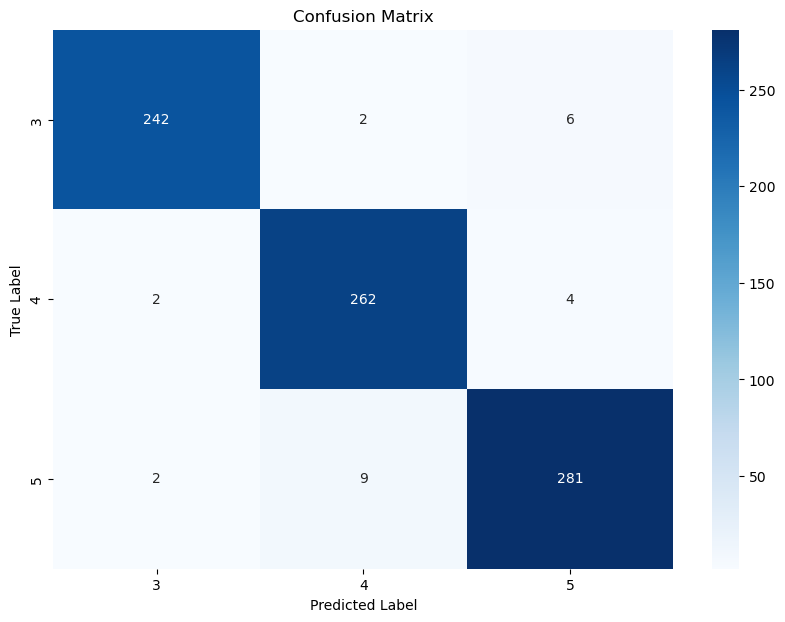

In [256]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Splitting df1 into training and test sets
X_train, X_test, y_train, y_test = train_test_split(tfidf_df_1, df1['sdg'], test_size=0.2, random_state=42)

# Initialize the RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the training set
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)
# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using seaborn for better visualization
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

### Evaluación modelo

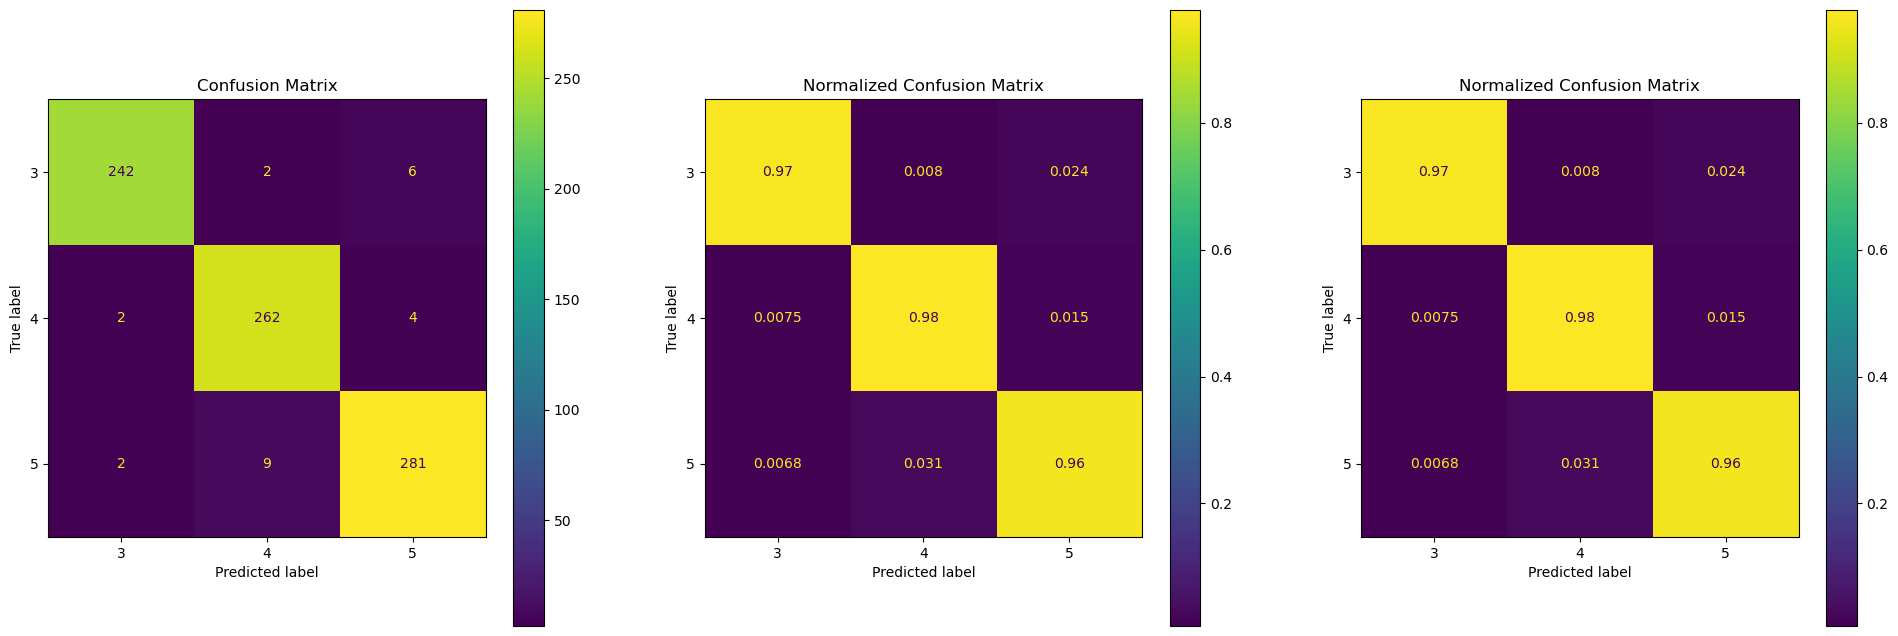

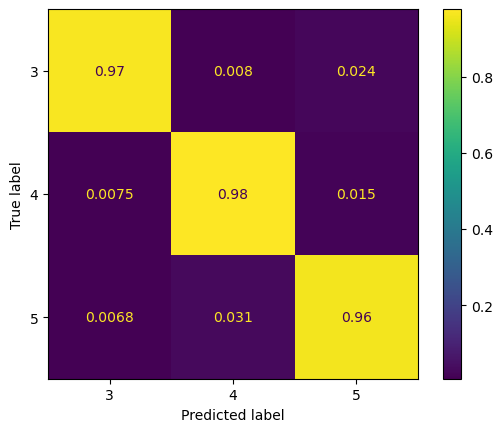

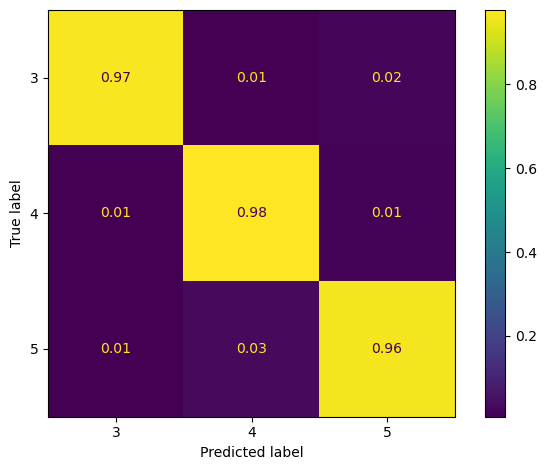

In [257]:

from sklearn.metrics import ConfusionMatrixDisplay


fig, axes = plt.subplots(1, 3, figsize=(24, 8))

ConfusionMatrixDisplay(conf_matrix, display_labels=clf.classes_).plot(ax=axes[0])
axes[0].set_title('Confusion Matrix')

ConfusionMatrixDisplay.from_predictions(y_test, y_pred, normalize='true').plot(ax=axes[1])
axes[1].set_title('Normalized Confusion Matrix')

# Plot the distribution of the predicted labels
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, normalize='true', values_format='.2f').plot(ax=axes[2])
axes[2].set_title('Normalized Confusion Matrix')


plt.tight_layout()
plt.show()


# Plot the distribution of the true labels


In [258]:
from sklearn.metrics import precision_score,recall_score,f1_score


precision_macro = precision_score(y_test, y_pred, average='macro')
print(f'Macro-averaged Precision: {precision_macro:.2f}')

recall_macro = recall_score(y_test, y_pred, average='macro')
print(f'Macro-averaged Recall: {recall_macro:.2f}')

f1_macro = f1_score(y_test, y_pred, average='macro')
print(f'Macro-averaged F1 Score: {f1_macro:.2f}')

precision_micro = precision_score(y_test, y_pred, average='micro')
print(f'Micro-averaged Precision: {precision_micro:.2f}')

recall_micro = recall_score(y_test, y_pred, average='micro')
print(f'Micro-averaged Recall: {recall_micro:.2f}')

f1_micro = f1_score(y_test, y_pred, average='micro')
print(f'Micro-averaged F1 Score: {f1_micro:.2f}')

precision_weighted = precision_score(y_test, y_pred, average='weighted')
print(f'Weighted Precision: {precision_weighted:.2f}')

recall_weighted = recall_score(y_test, y_pred, average='weighted')
print(f'Weighted Recall: {recall_weighted:.2f}')

f1_weighted = f1_score(y_test, y_pred, average='weighted')
print(f'Weighted F1 Score: {f1_weighted:.2f}')



Macro-averaged Precision: 0.97
Macro-averaged Recall: 0.97
Macro-averaged F1 Score: 0.97
Micro-averaged Precision: 0.97
Micro-averaged Recall: 0.97
Micro-averaged F1 Score: 0.97
Weighted Precision: 0.97
Weighted Recall: 0.97
Weighted F1 Score: 0.97


In [259]:


# Print the classification report to evaluate precision, recall, and F1-score
print("Classification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           3       0.98      0.97      0.98       250
           4       0.96      0.98      0.97       268
           5       0.97      0.96      0.96       292

    accuracy                           0.97       810
   macro avg       0.97      0.97      0.97       810
weighted avg       0.97      0.97      0.97       810



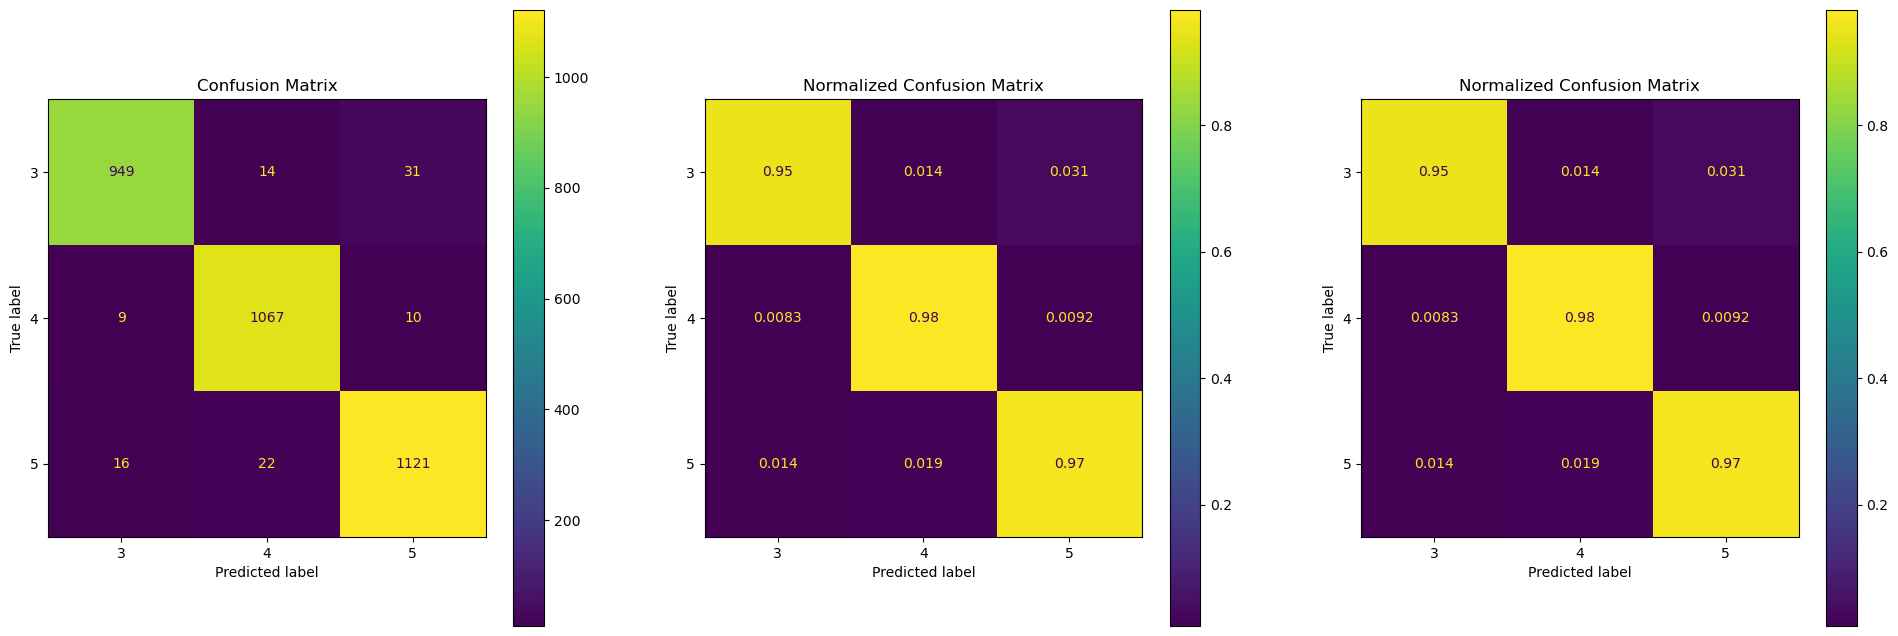

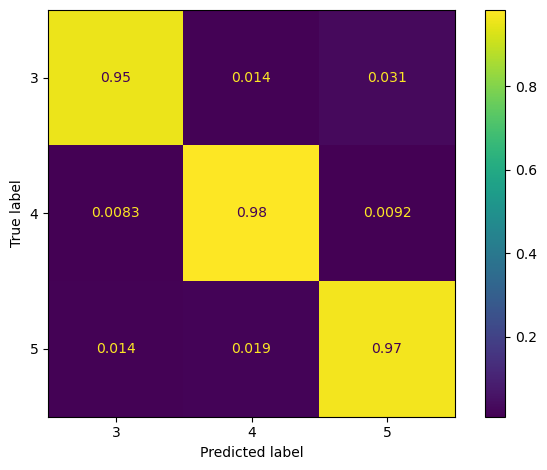

In [260]:
from sklearn.calibration import cross_val_predict


y_train_pred = cross_val_predict(clf, X_train, y_train, cv=5) # 5-fold cross-validation

# Create a confusion matrix
conf_matrix_train = confusion_matrix(y_train, y_train_pred)

# Plot the confusion matrix using seaborn for better visualization
fig, ax = plt.subplots(1,3,figsize=(24, 8))

ConfusionMatrixDisplay(conf_matrix_train, display_labels=clf.classes_).plot(ax=ax[0])
ax[0].set_title('Confusion Matrix')

ConfusionMatrixDisplay(confusion_matrix(y_train,y_train_pred, normalize='true'), display_labels=clf.classes_).plot(ax=ax[1])
ax[1].set_title('Normalized Confusion Matrix')

ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred, normalize='true').plot(ax=ax[2])
ax[2].set_title('Normalized Confusion Matrix')

plt.tight_layout()
plt.show()


In [261]:
precision_macro_train = precision_score(y_train, y_train_pred, average='macro')
print(f'Macro-averaged Precision: {precision_macro_train:.2f}')

recall_macro_train = recall_score(y_train, y_train_pred, average='macro')
print(f'Macro-averaged Recall: {recall_macro_train:.2f}')

f1_macro_train = f1_score(y_train, y_train_pred, average='macro')
print(f'Macro-averaged F1 Score: {f1_macro_train:.2f}')

precision_micro_train = precision_score(y_train, y_train_pred, average='micro')
print(f'Micro-averaged Precision: {precision_micro_train:.2f}')

recall_micro_train = recall_score(y_train, y_train_pred, average='micro')
print(f'Micro-averaged Recall: {recall_micro_train:.2f}')

f1_micro_train = f1_score(y_train, y_train_pred, average='micro')
print(f'Micro-averaged F1 Score: {f1_micro_train:.2f}')

precision_weighted_train = precision_score(y_train, y_train_pred, average='weighted')
print(f'Weighted Precision: {precision_weighted_train:.2f}')

recall_weighted_train = recall_score(y_train, y_train_pred, average='weighted')
print(f'Weighted Recall: {recall_weighted_train:.2f}')

f1_weighted_train = f1_score(y_train, y_train_pred, average='weighted')
print(f'Weighted F1 Score: {f1_weighted_train:.2f}')


Macro-averaged Precision: 0.97
Macro-averaged Recall: 0.97
Macro-averaged F1 Score: 0.97
Micro-averaged Precision: 0.97
Micro-averaged Recall: 0.97
Micro-averaged F1 Score: 0.97
Weighted Precision: 0.97
Weighted Recall: 0.97
Weighted F1 Score: 0.97


In [262]:
print("Classification Report:")
print(classification_report(y_train, y_train_pred))

Classification Report:
              precision    recall  f1-score   support

           3       0.97      0.95      0.96       994
           4       0.97      0.98      0.97      1086
           5       0.96      0.97      0.97      1159

    accuracy                           0.97      3239
   macro avg       0.97      0.97      0.97      3239
weighted avg       0.97      0.97      0.97      3239



### Análisis de las palabras identificadas:

In [263]:

predicted_labels = clf.predict(tfidf_df_2)

# Convert predictions to a DataFrame for better readability and potential saving
predicted_df = pd.DataFrame({'Predicted Labels': predicted_labels})

print(predicted_df.sample(20))

df2['sdg'] = predicted_labels

predicted_df.to_csv('TestODScat_345_result.csv', index=False)
df2.to_csv('TestODScat_345_result_with_text.csv', index=False)

print("Predicted 'sdg' column replaced in df2 and saved to 'TestODScat_345_result.csv' and 'TestODScat_345_result_with_text'")

     Predicted Labels
43                  4
617                 3
456                 5
251                 4
429                 5
501                 5
305                 3
385                 5
0                   4
275                 5
218                 5
442                 4
697                 3
407                 3
468                 5
248                 5
632                 5
546                 5
601                 5
331                 4
Predicted 'sdg' column replaced in df2 and saved to 'TestODScat_345_result.csv' and 'TestODScat_345_result_with_text'


### Predicción datos no etiquetados modelo

## Modelo 2 SVM (Federico Bogotá)

### Construcción modelo

In [264]:
df = pd.read_csv(file1, encoding='UTF-8')

df["Textos_espanol"] = df["Textos_espanol"].apply(corregir_tildes_texto)

df['Textos_espanol'] = df['Textos_espanol'].apply(clean_text)


In [265]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer


def drop_column(X):
    return X.drop(columns=['Textos_espanol'])

# Preprocesador: Aplica TF-IDF a la columna 'Textos_espanol'
preprocessor = ColumnTransformer(
    transformers=[
        ('tfidf', TfidfVectorizer(), 'Textos_espanol')  # Aplica TF-IDF a la columna de texto
    ], remainder='drop'  # Ignorar otras columnas por ahora
)

# Dividir los datos
x_train, x_test, y_train, y_test = train_test_split(df.drop(columns=["sdg"]), df['sdg'], test_size=0.2, random_state=42)

# Pipeline con preprocesamiento y SVM
pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("svm", SVC(kernel='linear'))
])

# Ajustar el pipeline
pipeline.fit(x_train, y_train)




Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('tfidf', TfidfVectorizer(),
                                                  'Textos_espanol')])),
                ('svm', SVC(kernel='linear'))])

### Evaluación modelo

In [266]:
import matplotlib.pyplot as plt
from sklearn.calibration import cross_val_predict
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix


y_train_pred = cross_val_predict(pipeline, x_train, y_train, cv=5)


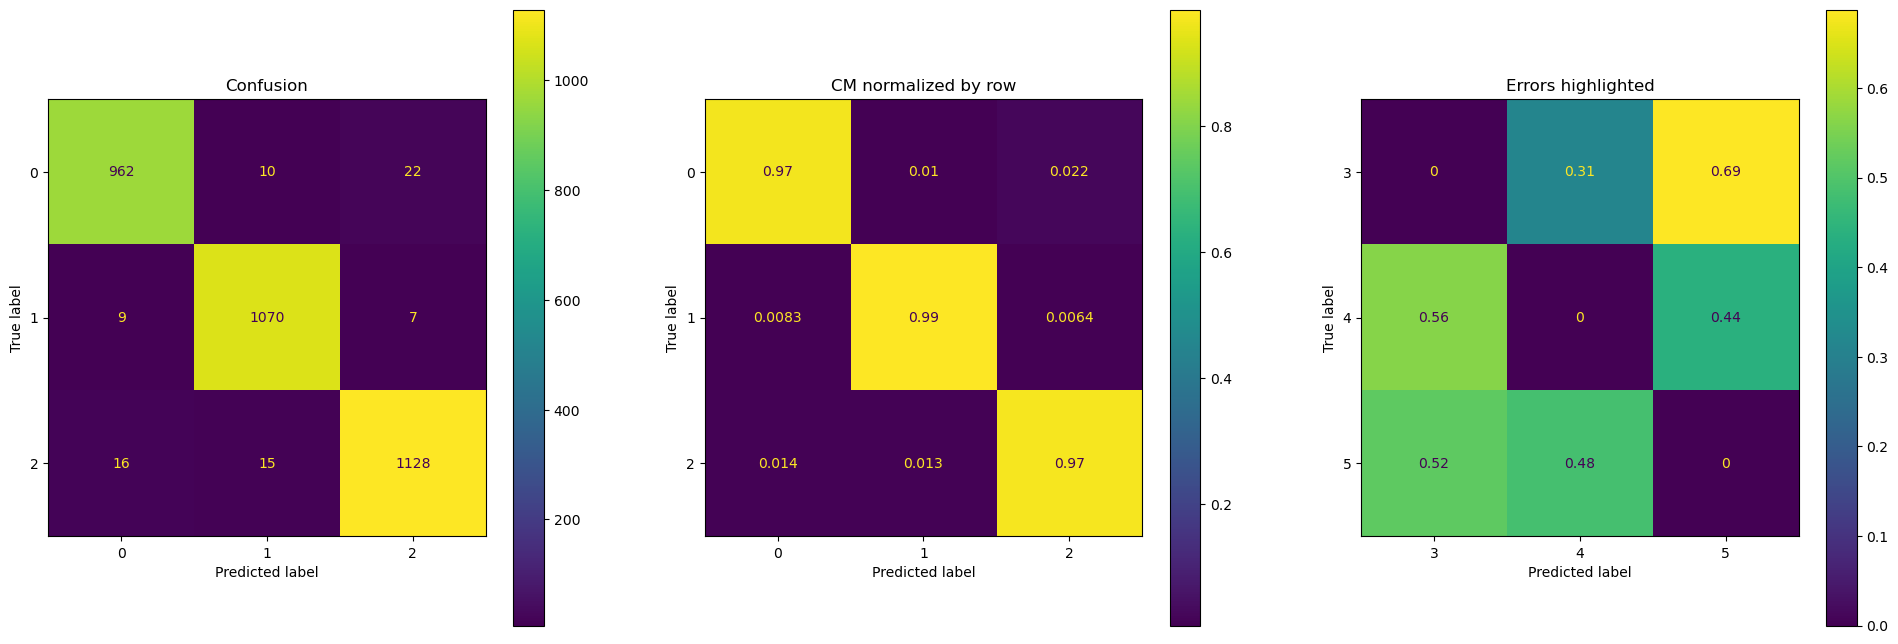

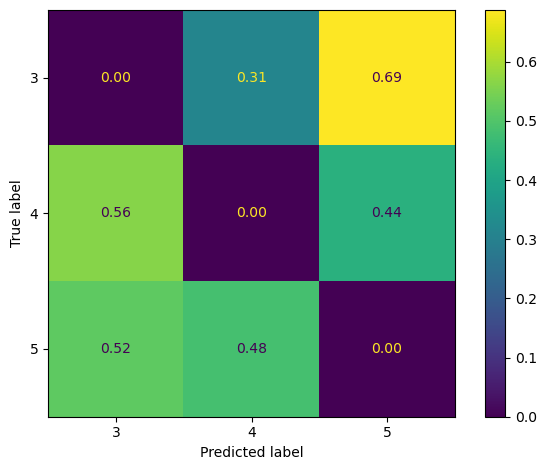

In [267]:

fig, axes = plt.subplots(1, 3, figsize=(24, 8))  # Crear una fila con 3 columnas para los gráficos

# Primera gráfica: Confusion matrix básica
ConfusionMatrixDisplay(confusion_matrix(y_train, y_train_pred)).plot(ax=axes[0], cmap="viridis")
axes[0].set_title("Confusion")

# Segunda gráfica: Confusion matrix normalizada
ConfusionMatrixDisplay(confusion_matrix(y_train, y_train_pred, normalize='true')).plot(ax=axes[1], cmap="viridis")
axes[1].set_title("CM normalized by row")

# Tercera gráfica: Confusion matrix con los errores resaltados
sample_weight = (y_train_pred != y_train)
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred, normalize="true", values_format=".2f", sample_weight=sample_weight).plot(ax=axes[2], cmap="viridis")
axes[2].set_title("Errors highlighted")

# Mostrar todas las gráficas
plt.tight_layout()
plt.show()



In [268]:
from sklearn.metrics import precision_score, recall_score, f1_score
precision = precision_score(y_train, y_train_pred, average='macro')
print(f'Precisión macro: {precision}')

# Calcular el recall
recall = recall_score(y_train, y_train_pred, average='macro')
print(f'Recall micro: {recall}')

# Calcular el F1-score
f1 = f1_score(y_train, y_train_pred, average='macro')
print(f'F1 Score macro: {f1}')

precision = precision_score(y_train, y_train_pred, average='micro')
print(f'Precisión micro: {precision}')

# Calcular el recall
recall = recall_score(y_train, y_train_pred, average='micro')
print(f'Recall micro: {recall}')

# Calcular el F1-score
print(f'F1 Score micro: {f1}')
f1 = f1_score(y_train, y_train_pred, average='micro')

precision = precision_score(y_train, y_train_pred, average='weighted')
print(f'Precisión weighted: {precision}')

# Calcular el recall
recall = recall_score(y_train, y_train_pred, average='weighted')
print(f'Recall weighted: {recall}')

# Calcular el F1-score
f1 = f1_score(y_train, y_train_pred, average='weighted')
print(f'F1 Score weighted: {f1}')



Precisión macro: 0.9755916154352094
Recall micro: 0.9754422267261903
F1 Score macro: 0.9755070670896401
Precisión micro: 0.975609756097561
Recall micro: 0.975609756097561
F1 Score micro: 0.9755070670896401
Precisión weighted: 0.9756029777220996
Recall weighted: 0.975609756097561
F1 Score weighted: 0.97559678319645


In [269]:

from sklearn.metrics import classification_report

print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           3       0.97      0.97      0.97       994
           4       0.98      0.99      0.98      1086
           5       0.97      0.97      0.97      1159

    accuracy                           0.98      3239
   macro avg       0.98      0.98      0.98      3239
weighted avg       0.98      0.98      0.98      3239



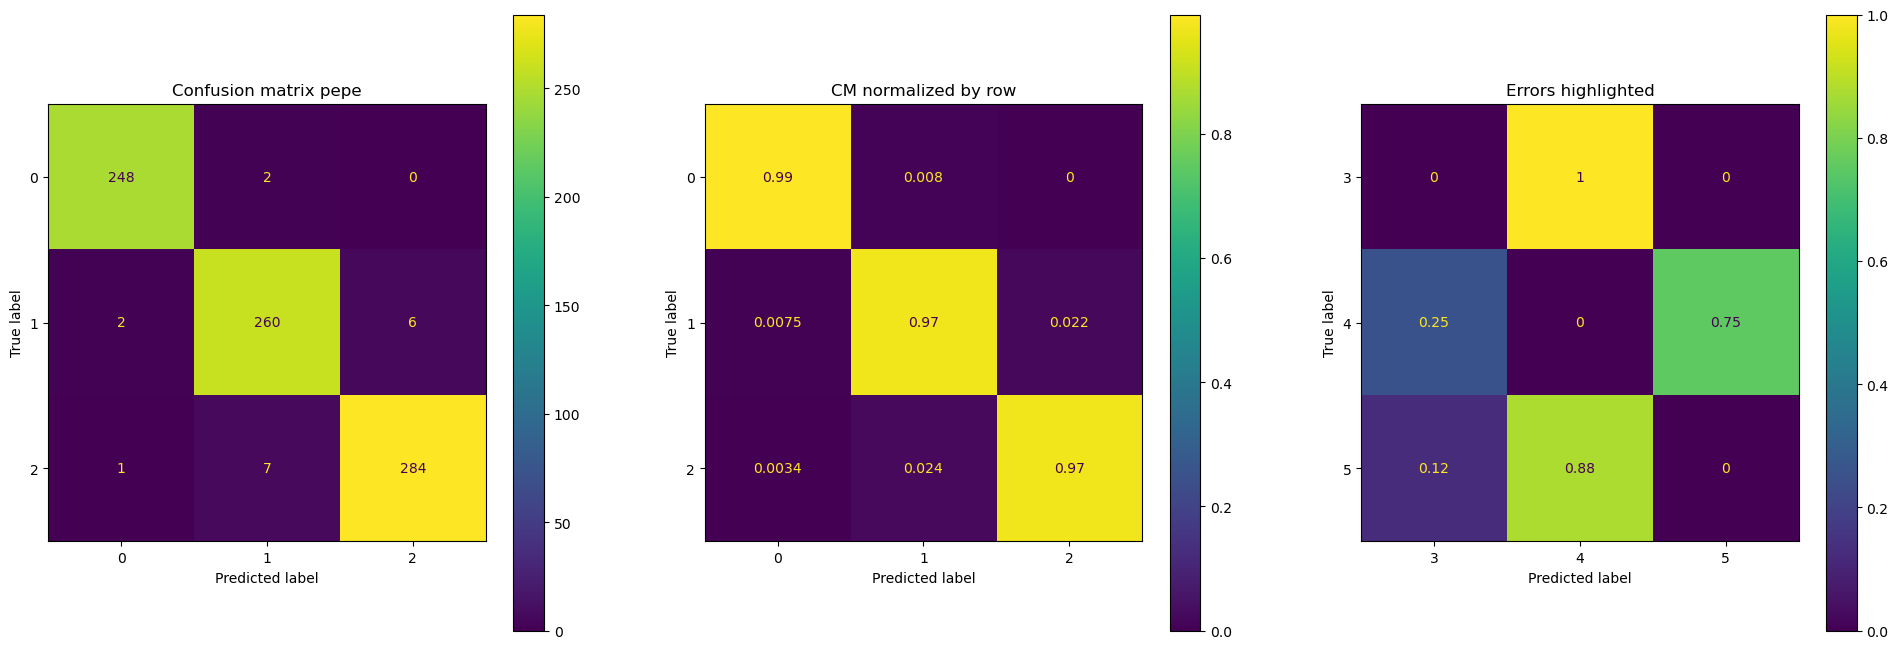

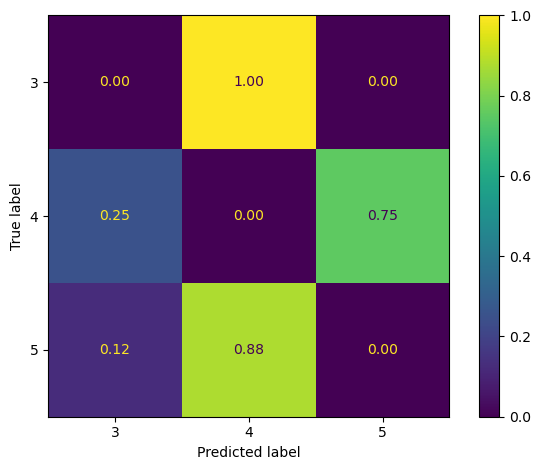

In [270]:
y_test_pred = pipeline.predict(x_test)
fig, axes = plt.subplots(1, 3, figsize=(24, 8))  # Crear una fila con 3 columnas para los gráficos
# ConfusionMatrixDisplay(confusion_matrix(y_test, y_test_pred)).plot()
# plt.show()

ConfusionMatrixDisplay(confusion_matrix(y_test, y_test_pred)).plot(ax=axes[0], cmap="viridis")
axes[0].set_title("Confusion matrix pepe")

# Segunda gráfica: Confusion matrix normalizada
ConfusionMatrixDisplay(confusion_matrix(y_test, y_test_pred, normalize='true')).plot(ax=axes[1], cmap="viridis")
axes[1].set_title("CM normalized by row")

# Tercera gráfica: Confusion matrix con los errores resaltados
sample_weight_test = (y_test_pred != y_test)
ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred, normalize="true", values_format=".2f", sample_weight=sample_weight_test).plot(ax=axes[2], cmap="viridis")
axes[2].set_title("Errors highlighted")

# Mostrar todas las gráficas
plt.tight_layout()

In [271]:
precision_test = precision_score(y_test, y_test_pred, average='macro')
print(f'Precisión test: {precision_test}')

# Calcular el recall
recall_test = recall_score(y_test, y_test_pred, average='macro')

print(f'Recall test: {recall_test}')

# Calcular el F1-score
f1_test = f1_score(y_test, y_test_pred, average='macro')

print(f'F1 Score test: {f1_test}')

presicion_test = precision_score(y_test, y_test_pred, average='micro')
print(f'Precisión micro: {presicion_test}')

# Calcular el recall
recall_test = recall_score(y_test, y_test_pred, average='micro')
print(f'Recall micro: {recall_test}')

# Calcular el F1-score
f1_test = f1_score(y_test, y_test_pred, average='micro')
print(f'F1 Score micro: {f1_test}')

precision_test = precision_score(y_test, y_test_pred, average='weighted')
print(f'Precisión weighted: {precision_test}')

# Calcular el recall
recall_test = recall_score(y_test, y_test_pred, average='weighted')
print(f'Recall weighted: {recall_test}')

# Calcular el F1-score
f1_test = f1_score(y_test, y_test_pred, average='weighted')
print(f'F1 Score weighted: {f1_test}')


Precisión test: 0.9779669681739648
Recall test: 0.9782506644857901
F1 Score test: 0.978102540527423
Precisión micro: 0.9777777777777777
Recall micro: 0.9777777777777777
F1 Score micro: 0.9777777777777777
Precisión weighted: 0.9777827532468653
Recall weighted: 0.9777777777777777
F1 Score weighted: 0.9777737823641754


In [272]:
print(classification_report(y_test, y_test_pred))   

              precision    recall  f1-score   support

           3       0.99      0.99      0.99       250
           4       0.97      0.97      0.97       268
           5       0.98      0.97      0.98       292

    accuracy                           0.98       810
   macro avg       0.98      0.98      0.98       810
weighted avg       0.98      0.98      0.98       810



### Análisis de palabras identificadas

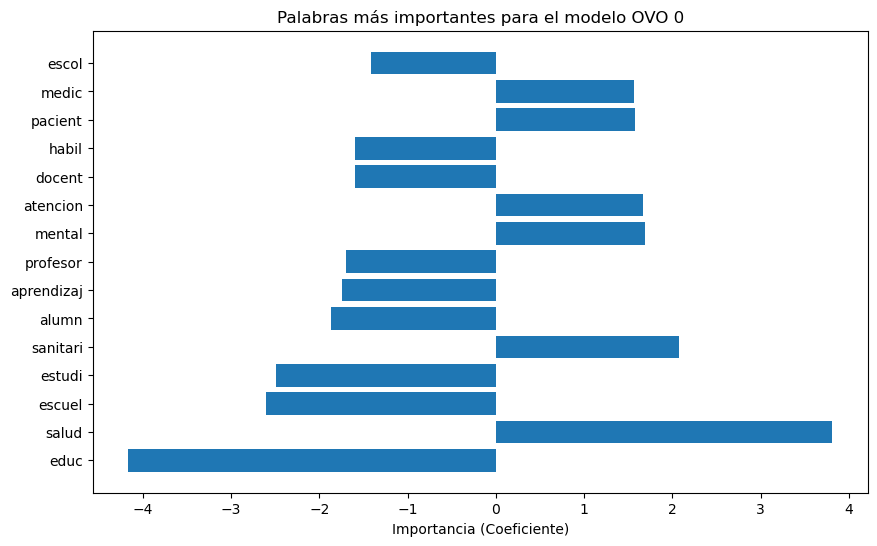

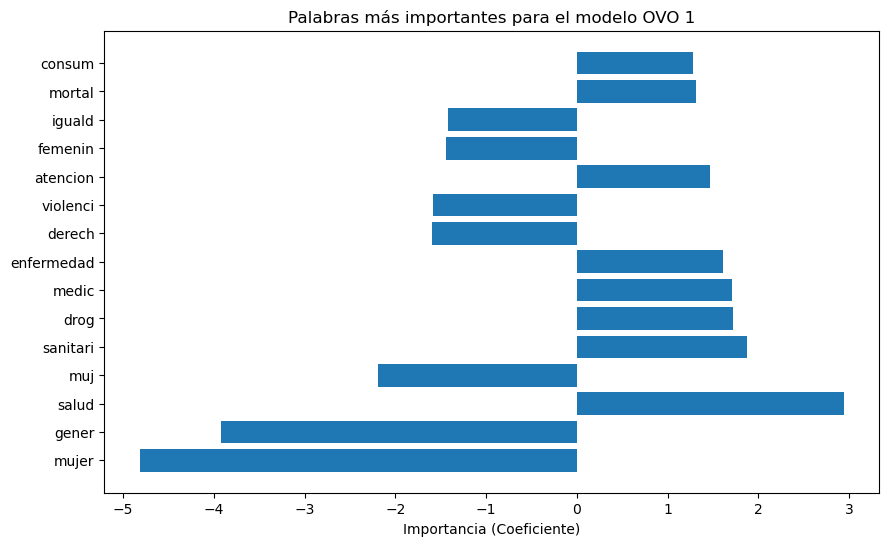

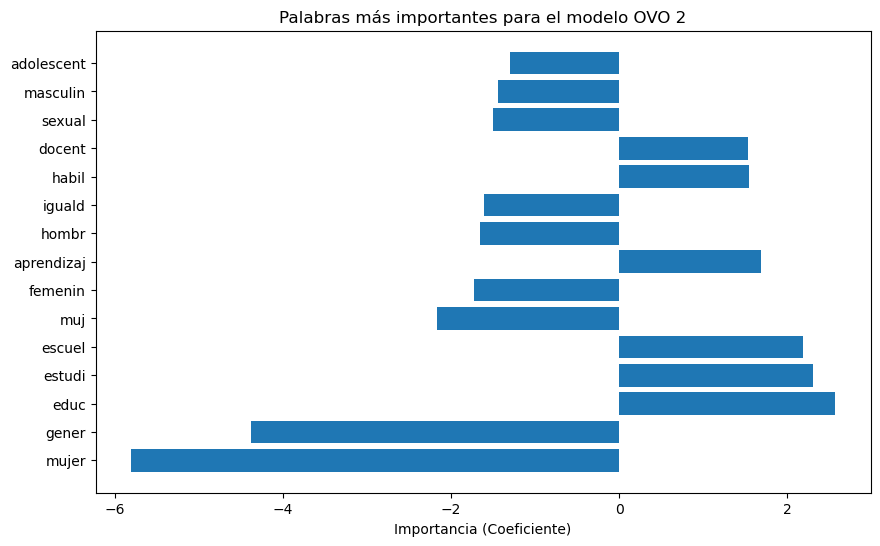

In [273]:
# Después de entrenar el pipeline
model = pipeline.named_steps['svm']

# Obtener los coeficientes del modelo lineal
coefficients = model.coef_.toarray()

feature_names = pipeline.named_steps['preprocessor'].named_transformers_['tfidf'].get_feature_names_out()

def plot_top_words_per_class(coefs, class_index, feature_names, top_n=10):
    importance = zip(feature_names, coefs[class_index])
    sorted_importance = sorted(importance, key=lambda x: abs(x[1]), reverse=True)  # Ordenar por valor absoluto
    
    # Seleccionar las top_n palabras más importantes
    top_words = sorted_importance[:top_n]
    
    words, coef = zip(*top_words)
    
    plt.figure(figsize=(10, 6))
    plt.barh(words, coef)
    plt.xlabel("Importancia (Coeficiente)")
    plt.title(f"Palabras más importantes para el modelo OVO {class_index}")
    plt.show()
    
    return top_words

# Graficar para cada clase
top_words_classes = []
for class_index in range(coefficients.shape[0]):
    top_words_classes.append(plot_top_words_per_class(coefficients, class_index, feature_names, top_n=15))


####### Imporatnte leer el markdown de abajo para poder entender mejor los coeficientes en cada una de las gráficas ########

**Importante**:
Como resultado de aplicar SVC para entrenar el modelo, el cual es un clasificador **binario**, para poder ser utilizado en tareas de multiclasificación se entrena un modelo SVC por cada par de clases. En este caso los modelos entrenados son los siguientes. Uno entre la clase 3 y 4, otro entre la clase 3 y 5 y un último entre la clase 4 y 5. Por ende, los coeficientes se interpretan de la siguiente manera:
1. Primera gráfica entre el clasificador OVO  tomando la clase 3 como positiva y la 4 como negativa. En síntesis, coeficientes positivos favorecen al ODS 3 y negativos al ODS 4.
2. Segunda gráfica entre el clasificador OVO tomando la clase 3 y la clase 5 como negativa. En síntesis, coeficientes pósitivos favorecen al ODS 3 y negativos al ODS 5.
3. Tercera gráfica entre el clasificador OVO tomando la clase 4 como positiva y la 5 como negativa. En síntesis, coeficientes positivos favorecen al ODS 4 y negativos al ODS 5.

### Prediccion datos no etiquetados modelo

In [274]:
df_2 = pd.read_csv(file2, encoding='UTF-8')
df_prediccion = df_2.copy()
df_prediccion["Textos_espanol"] = df_prediccion["Textos_espanol"].apply(corregir_tildes_texto)
df_prediccion['Textos_espanol'] = df_prediccion['Textos_espanol'].apply(clean_text)
df_prediccion.head(1)






,Textos_espanol,sdg
0,examin contribucion univers institu educ terciari desarroll capital human competent transferent tecnologa innov empresarial desarroll social cultural medioambiental creacion capac regional proces revision facilit creacion asoci ciudad region reun institu educ terciari organ public priv identific objet estrateg trabaj junt alcanz complement revision llev cab region transfronteriz mexicoest unid gran import estrateg econom nuev leon region pas nort mas recient sur arizon junt sonor,NaN


In [275]:
df_2["sdg"] = pipeline.predict(df_prediccion)
df_2.to_csv('TestODScat_345_modelo2.csv', index=False)

print(df_2["sdg"])


0      4
1      3
2      4
3      3
4      4
5      3
6      4
7      3
8      4
9      4
10     4
11     3
12     3
13     3
14     3
15     3
16     4
17     4
18     3
19     4
20     3
21     4
22     3
23     3
24     4
25     3
26     4
27     3
28     4
29     4
30     3
31     4
32     3
33     4
34     3
35     4
36     3
37     4
38     3
39     4
40     4
41     4
42     4
43     4
44     3
45     4
46     3
47     4
48     3
49     3
50     4
51     3
52     4
53     4
54     4
55     4
56     3
57     4
58     3
59     4
60     4
61     3
62     3
63     3
64     5
65     3
66     3
67     3
68     5
69     5
70     3
71     4
72     4
73     4
74     4
75     5
76     4
77     5
78     4
79     4
80     3
81     3
82     5
83     5
84     4
85     4
86     4
87     4
88     4
89     5
90     5
91     4
92     4
93     5
94     5
95     5
96     5
97     4
98     5
99     4
100    5
101    3
102    5
103    3
104    4
105    5
106    5
107    3
108    4
109    4
110    4
1

## Modelo 3 DecisionTreeClassifier (Carlos Casadiego)

### Construcción modelo

In [276]:
dfp = df.copy()
vectorizer = TfidfVectorizer()
tf_idf = vectorizer.fit_transform(df1['Textos_espanol'])
tf_idf = pd.DataFrame(tf_idf.toarray(), columns=vectorizer.get_feature_names_out())
tf_idf["sdg"] = df1["sdg"]

# for feature in vectorizer.get_feature_names_out():
#     print(feature)

#dfp.isna().sum()
tf_idf.isna().sum()


_par                                                                  0
aalt                                                                  0
aalton                                                                0
aarkrog                                                               0
aarrev                                                                0
abaj                                                                  0
aban                                                                  0
abander                                                               0
abandon                                                               0
abarc                                                                 0
abarcari                                                              0
abarqu                                                                0
abbas                                                                 0
abbasi                                                          

In [277]:
from sklearn.model_selection import GridSearchCV, train_test_split
#x_train, x_test, y_train, y_test = train_test_split(df, df['sdg'], test_size=0.2, random_state=42)
X_data = tf_idf.drop(columns=["sdg"])
Y_data = tf_idf["sdg"]

### Evaluación modelo

Text(0.5, 1.0, 'Errors highlighted')

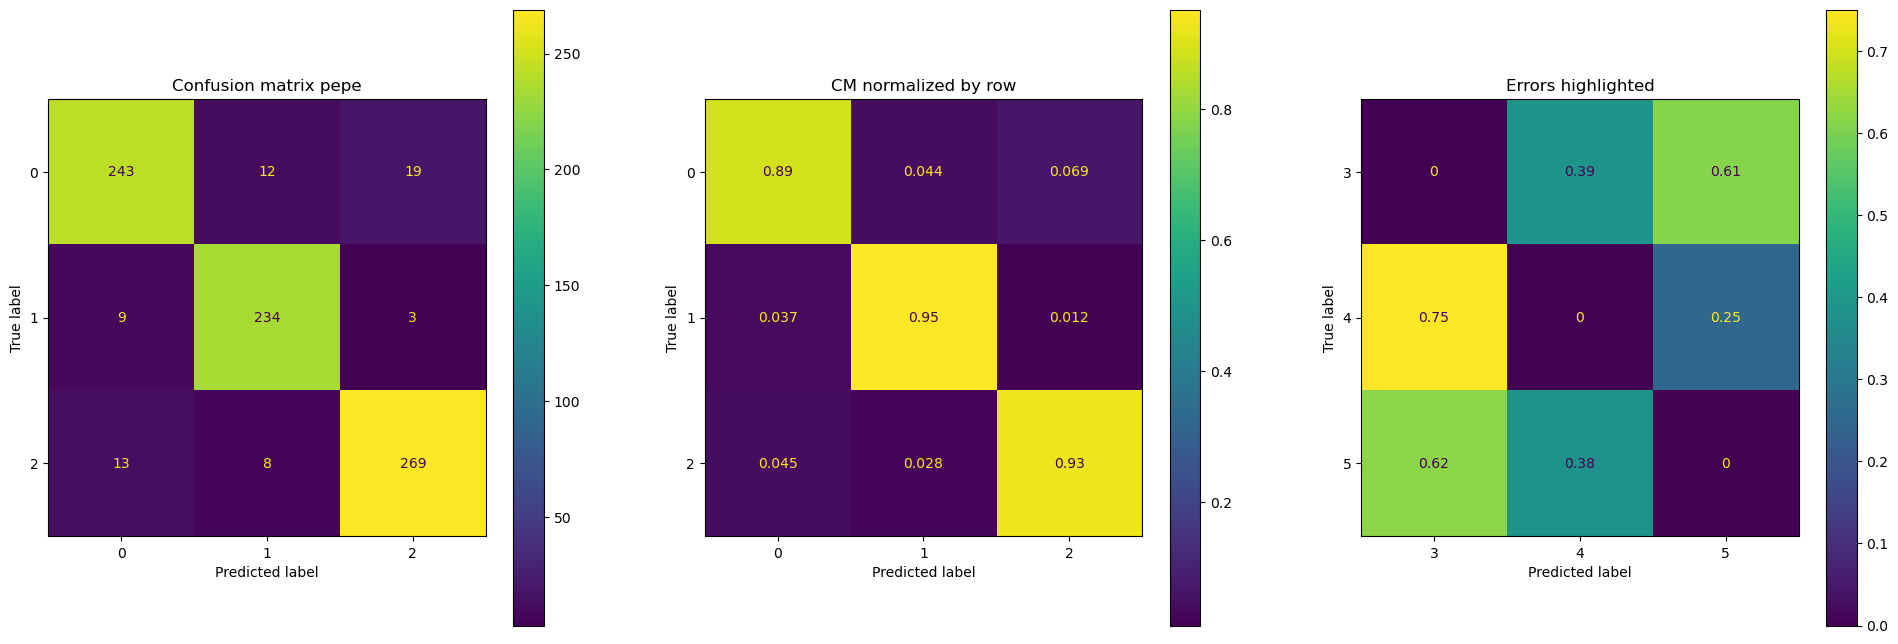

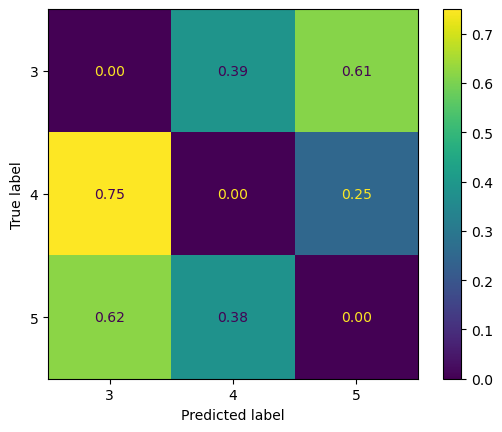

In [278]:
from sklearn.tree import DecisionTreeClassifier

# Dividir datos en entrenamiento (80%) y test (20%)
X_train, X_test, Y_train, Y_test = train_test_split(X_data, Y_data, train_size = 0.8, random_state=1234, shuffle=True)

# Crear el objeto de arbol de decisión utilizando como criterio de pureza la entropía
arbol = DecisionTreeClassifier(criterion="entropy", random_state=0)

# Entrenar el modelo con los datos de entrenamiento
arbol = arbol.fit(X_train, Y_train)

# Determinar las predicciones del modelo sobre el conjunto de prueba
Y_pred = arbol.predict(X_test)

# Generar matriz de confusión
confusion_matrix(Y_test, Y_pred)

Y_pred = arbol.predict(X_test)

# Calcula la matriz de confusión
cm = confusion_matrix(Y_test, Y_pred)

fig, axes = plt.subplots(1, 3, figsize=(24, 8))  # Crear una fila con 3 columnas para los gráficos

# Primera gráfica: Confusion matrix básica
ConfusionMatrixDisplay(confusion_matrix(Y_test, Y_pred)).plot(ax=axes[0], cmap="viridis")
axes[0].set_title("Confusion matrix pepe")

# Segunda gráfica: Confusion matrix normalizada
ConfusionMatrixDisplay(confusion_matrix(Y_test, Y_pred, normalize='true')).plot(ax=axes[1], cmap="viridis")
axes[1].set_title("CM normalized by row")

# Tercera gráfica: Confusion matrix con los errores resaltados
sample_weight = (Y_pred != Y_test)

ConfusionMatrixDisplay.from_predictions(Y_test, Y_pred, normalize="true", values_format=".2f", sample_weight=sample_weight).plot(ax=axes[2], cmap="viridis")
axes[2].set_title("Errors highlighted")


# Visualiza la matriz de confusión
# disp = ConfusionMatrixDisplay(confusion_matrix=cm)
# disp.plot()
# plt.show()

In [279]:
precision_macro = precision_score(Y_test, Y_pred, average='macro')
print(f'Precisión macro: {precision_macro}')

# Calcular el recall
recall_macro = recall_score(Y_test, Y_pred, average='macro')
print(f'Recall macro: {recall_macro}')

# Calcular el F1-score
f1_macro = f1_score(Y_test, Y_pred, average='macro')
print(f'F1 Score macro: {f1_macro}')

precision_micro = precision_score(Y_test, Y_pred, average='micro')
print(f'Precisión micro: {precision_micro}')

# Calcular el recall
recall_micro = recall_score(Y_test, Y_pred, average='micro')
print(f'Recall micro: {recall_micro}')

# Calcular el F1-score
f1_micro = f1_score(Y_test, Y_pred, average='micro')

print(f'F1 Score micro: {f1_micro}')
f1 = f1_score(Y_test, Y_pred, average='micro')

precision_weighted = precision_score(Y_test, Y_pred, average='weighted')
print(f'Precisión weighted: {precision_weighted}')

# Calcular el recall
recall_weighted = recall_score(Y_test, Y_pred, average='weighted')

print(f'Recall weighted: {recall_weighted}')

# Calcular el F1-score
f1_weighted = f1_score(Y_test, Y_pred, average='weighted')
print(f'F1 Score weighted: {f1_weighted}')


Precisión macro: 0.9208798666749033
Recall macro: 0.9218890109867622
F1 Score macro: 0.9212198105967468
Precisión micro: 0.9209876543209876
Recall micro: 0.9209876543209876
F1 Score micro: 0.9209876543209876
Precisión weighted: 0.9209362380532001
Recall weighted: 0.9209876543209876
F1 Score weighted: 0.9208031099730468


In [280]:
# Mostrar reporte de clasificación

print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           3       0.92      0.89      0.90       274
           4       0.92      0.95      0.94       246
           5       0.92      0.93      0.93       290

    accuracy                           0.92       810
   macro avg       0.92      0.92      0.92       810
weighted avg       0.92      0.92      0.92       810



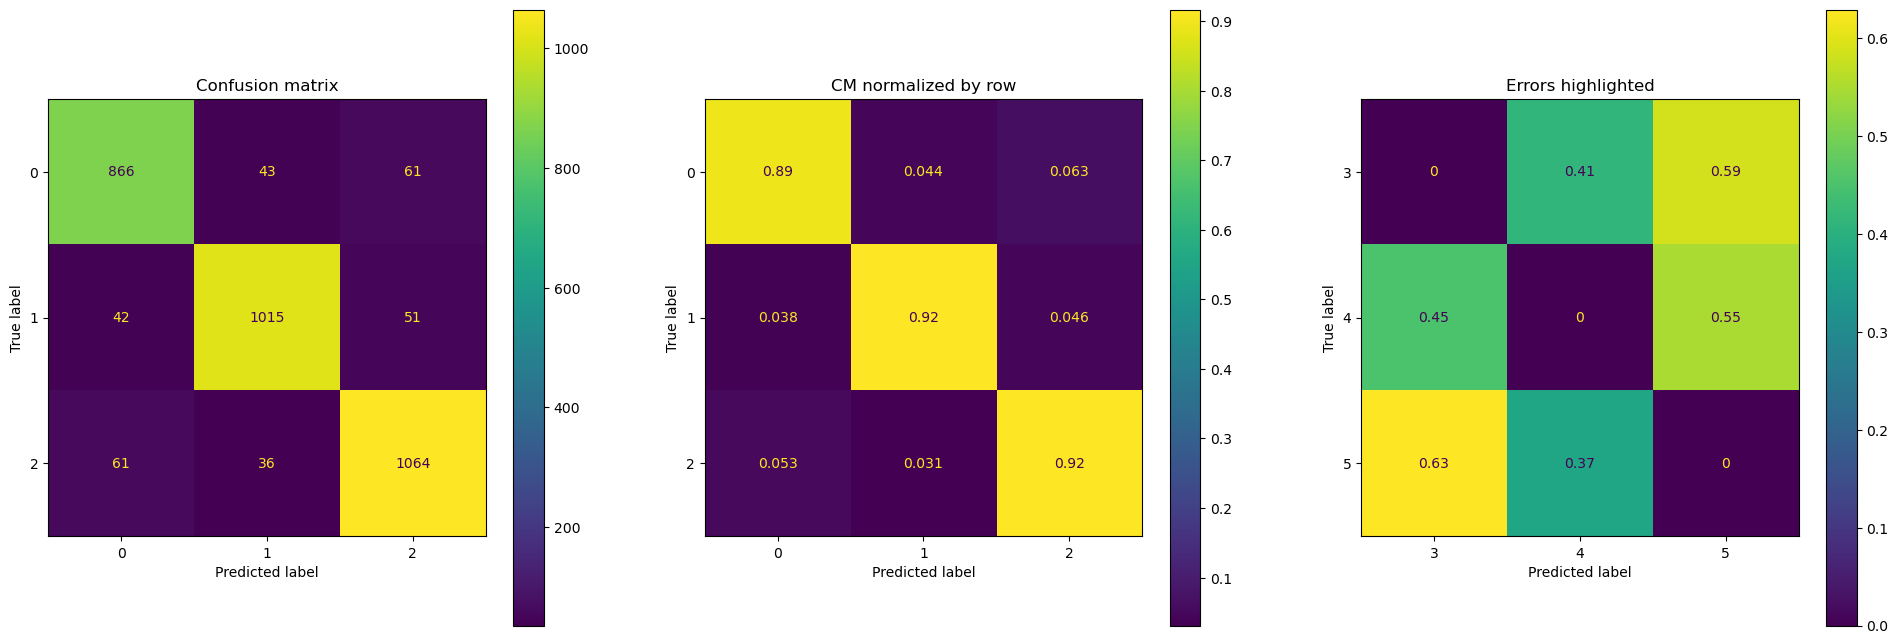

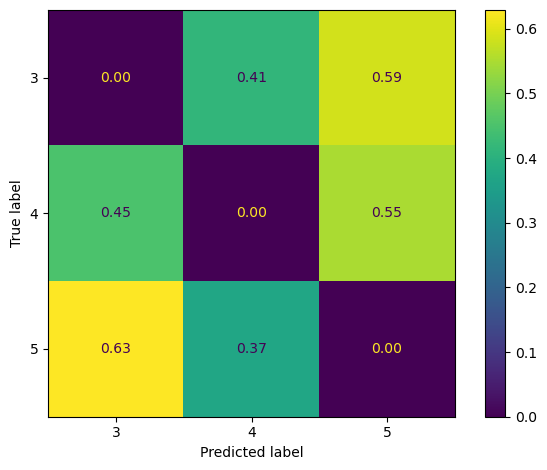

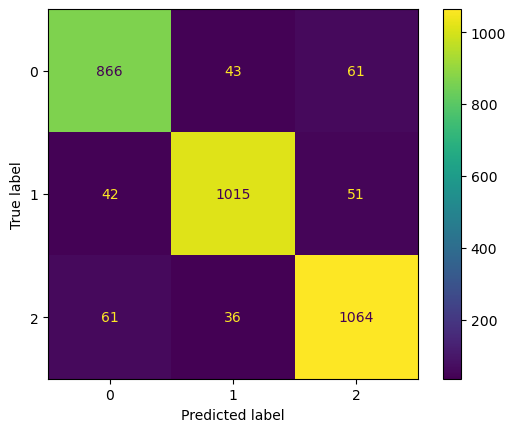

In [281]:
y_train_pred = cross_val_predict(arbol, X_train, Y_train, cv=5)

fig, axes = plt.subplots(1, 3, figsize=(24, 8))  # Crear una fila con 3 columnas para los gráficos

# Primera gráfica: Confusion matrix básica
ConfusionMatrixDisplay(confusion_matrix(Y_train, y_train_pred)).plot(ax=axes[0], cmap="viridis")
axes[0].set_title("Confusion matrix")

# Segunda gráfica: Confusion matrix normalizada
ConfusionMatrixDisplay(confusion_matrix(Y_train, y_train_pred, normalize='true')).plot(ax=axes[1], cmap="viridis")
axes[1].set_title("CM normalized by row")

# Tercera gráfica: Confusion matrix con los errores resaltados
sample_weight = (y_train_pred != Y_train)
ConfusionMatrixDisplay.from_predictions(Y_train, y_train_pred, normalize="true", values_format=".2f", sample_weight=sample_weight).plot(ax=axes[2], cmap="viridis")
axes[2].set_title("Errors highlighted")

# Mostrar todas las gráficas
plt.tight_layout()
plt.show()

disp = ConfusionMatrixDisplay(confusion_matrix(Y_train, y_train_pred)).plot()
plt.show()



In [282]:
precision_macro_train = precision_score(Y_train, y_train_pred, average='macro')
print(f'Precisión macro: {precision_macro_train}')

# Calcular el recall
recall_macro_train = recall_score(Y_train, y_train_pred, average='macro')
print(f'Recall macro: {recall_macro_train}')

# Calcular el F1-score
f1_macro_train = f1_score(Y_train, y_train_pred, average='macro')
print(f'F1 Score macro: {f1_macro_train}')

precision_micro_train = precision_score(Y_train, y_train_pred, average='micro')
print(f'Precisión micro: {precision_micro_train}')

# Calcular el recall
recall_micro_train = recall_score(Y_train, y_train_pred, average='micro')
print(f'Recall micro: {recall_micro_train}')

# Calcular el F1-score
f1_micro_train = f1_score(Y_train, y_train_pred, average='micro')
print(f'F1 Score micro: {f1_micro_train}')

precision_weighted_train = precision_score(Y_train, y_train_pred, average='weighted')
print(f'Precisión weighted: {precision_weighted_train}')

# Calcular el recall
recall_weighted_train = recall_score(Y_train, y_train_pred, average='weighted')
print(f'Recall weighted: {recall_weighted_train}')

# Calcular el F1-score
f1_weighted_train = f1_score(Y_train, y_train_pred, average='weighted')
print(f'F1 Score weighted: {f1_weighted_train}')


Precisión macro: 0.9087515631031912
Recall macro: 0.9084332740533613
F1 Score macro: 0.9085674125034551
Precisión micro: 0.9092312442111763
Recall micro: 0.9092312442111763
F1 Score micro: 0.9092312442111763
Precisión weighted: 0.9093273563931903
Recall weighted: 0.9092312442111763
F1 Score weighted: 0.9092530342756753


In [283]:
print(classification_report(Y_train, y_train_pred))

              precision    recall  f1-score   support

           3       0.89      0.89      0.89       970
           4       0.93      0.92      0.92      1108
           5       0.90      0.92      0.91      1161

    accuracy                           0.91      3239
   macro avg       0.91      0.91      0.91      3239
weighted avg       0.91      0.91      0.91      3239



### Predicción datos no etiquetados modelo